In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import itertools
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

2025-11-25 23:36:20.233691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764113780.424681      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764113780.483855      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
data = pd.read_csv("/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv")

In [3]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
data.shape

(32581, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Data Preprocessing

## Handle missing values

In [6]:
data.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [7]:
data['person_emp_length'] = data['person_emp_length'].fillna(data['person_emp_length'].median())

In [8]:
data = data.drop(['loan_int_rate'], axis=1)

In [9]:
data.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

## Handle duplicates

In [10]:
data = data.drop_duplicates()

## Handle outliers

In [11]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32405.000000,3.240500e+04,32405.000000,32405.000000,32405.000000,32405.000000,32405.000000
mean,27.748125,6.609516e+04,4.769542,9594.201512,0.218732,0.170252,5.812344
std,6.354683,6.202414e+04,4.090647,6323.225445,0.413393,0.106820,4.059290
min,20.000000,4.000000e+03,0.000000,500.000000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,0.000000,0.150000,4.000000
75%,30.000000,7.938000e+04,7.000000,12250.000000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,1.000000,0.830000,30.000000


In [12]:
age_outliers = data[data['person_age'] > 100].shape[0]
income_outliers = data[data['person_income'] > 300000].shape[0]
emp_outliers = data[data['person_emp_length'] > 50].shape[0]

print("Outliers in person_age:", age_outliers)
print("Outliers in person_income:", income_outliers)
print("Outliers in person_emp_length:", emp_outliers)

Outliers in person_age: 5
Outliers in person_income: 137
Outliers in person_emp_length: 2


In [13]:
# Remove outliers for person_age > 100
data = data[data['person_age'] <= 100]

In [14]:
# Remove outliers for person_income > 300,000
data = data[data['person_income'] <= 300000]

In [15]:
# Remove outliers for employment length > 50 years
data = data[data['person_emp_length'] <= 50]

In [16]:
data['loan_percent_income'] = round(data['loan_amnt'] / data['person_income'], 2)

In [17]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.64,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,1,0.25,N,2


## Encode categorical variables

In [18]:
# 1) Binary Encoding
data['cb_person_default_on_file'] = data['cb_person_default_on_file'].map({'Y': 1, 'N': 0})

# 2) Ordinal Encoding for loan_grade (A < B < C < D < E < F < G)
grade_order = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}
data['loan_grade'] = data['loan_grade'].map(grade_order)

# 3) One-Hot Encoding for nominal categorical columns
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32262 entries, 1 to 32580
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   32262 non-null  int64  
 1   person_income                32262 non-null  int64  
 2   person_emp_length            32262 non-null  float64
 3   loan_grade                   32262 non-null  int64  
 4   loan_amnt                    32262 non-null  int64  
 5   loan_status                  32262 non-null  int64  
 6   loan_percent_income          32262 non-null  float64
 7   cb_person_default_on_file    32262 non-null  int64  
 8   cb_person_cred_hist_length   32262 non-null  int64  
 9   person_home_ownership_OTHER  32262 non-null  bool   
 10  person_home_ownership_OWN    32262 non-null  bool   
 11  person_home_ownership_RENT   32262 non-null  bool   
 12  loan_intent_EDUCATION        32262 non-null  bool   
 13  loan_intent_HOMEIMPRO

## Correlation Heatmap

In [20]:
corr = data.corr()
corr

,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
person_age,1.000000,0.105884,0.168414,0.011836,0.047268,-0.020252,-0.034158,0.004882,0.877468,-0.010570,-0.000884,-0.028279,-0.091963,0.076440,0.021514,0.033228,-0.013878
person_income,0.105884,1.000000,0.187866,-0.009116,0.405985,-0.220288,-0.341368,-0.013782,0.086829,0.003985,-0.063075,-0.267178,-0.010996,0.070971,-0.058342,0.004262,0.008141
person_emp_length,0.168414,0.187866,1.000000,-0.048068,0.110095,-0.085919,-0.054779,-0.030031,0.145559,-0.014341,0.023643,-0.231488,-0.037931,0.031869,-0.002091,0.008395,0.009987
loan_grade,0.011836,-0.009116,-0.048068,1.000000,0.145038,0.373752,0.129890,0.536554,0.013205,0.016947,-0.016856,0.120967,-0.008272,0.029141,0.001393,-0.006603,-0.010909
loan_amnt,0.047268,0.405985,0.110095,0.145038,1.000000,0.107214,0.587069,0.037996,0.038255,0.010806,-0.025823,-0.113765,-0.007918,0.042532,-0.024927,-0.001043,-0.000617
loan_status,-0.020252,-0.220288,-0.085919,0.373752,0.107214,1.000000,0.385999,0.179083,-0.014846,0.013475,-0.102303,0.238323,-0.055512,0.037078,0.055996,-0.021713,-0.078131
loan_percent_income,-0.034158,-0.341368,-0.054779,0.129890,0.587069,0.385999,1.000000,0.039792,-0.024417,0.012683,0.050041,0.113405,-0.003421,-0.016571,0.021330,-0.005327,-0.001300
cb_person_default_on_file,0.004882,-0.013782,-0.030031,0.536554,0.037996,0.179083,0.039792,1.000000,0.002470,0.013850,-0.003667,0.061921,-0.006196,0.015170,-0.003141,-0.003333,-0.003008
cb_person_cred_hist_length,0.877468,0.086829,0.145559,0.013205,0.038255,-0.014846,-0.024417,0.002470,1.000000,-0.008566,0.005076,-0.023606,-0.077728,0.058648,0.016799,0.034513,-0.008785
person_home_ownership_OTHER,-0.010570,0.003985,-0.014341,0.016947,0.010806,0.013475,0.012683,0.013850,-0.008566,1.000000,-0.016667,-0.057589,-0.006314,-0.000908,-0.003356,0.000549,0.009721


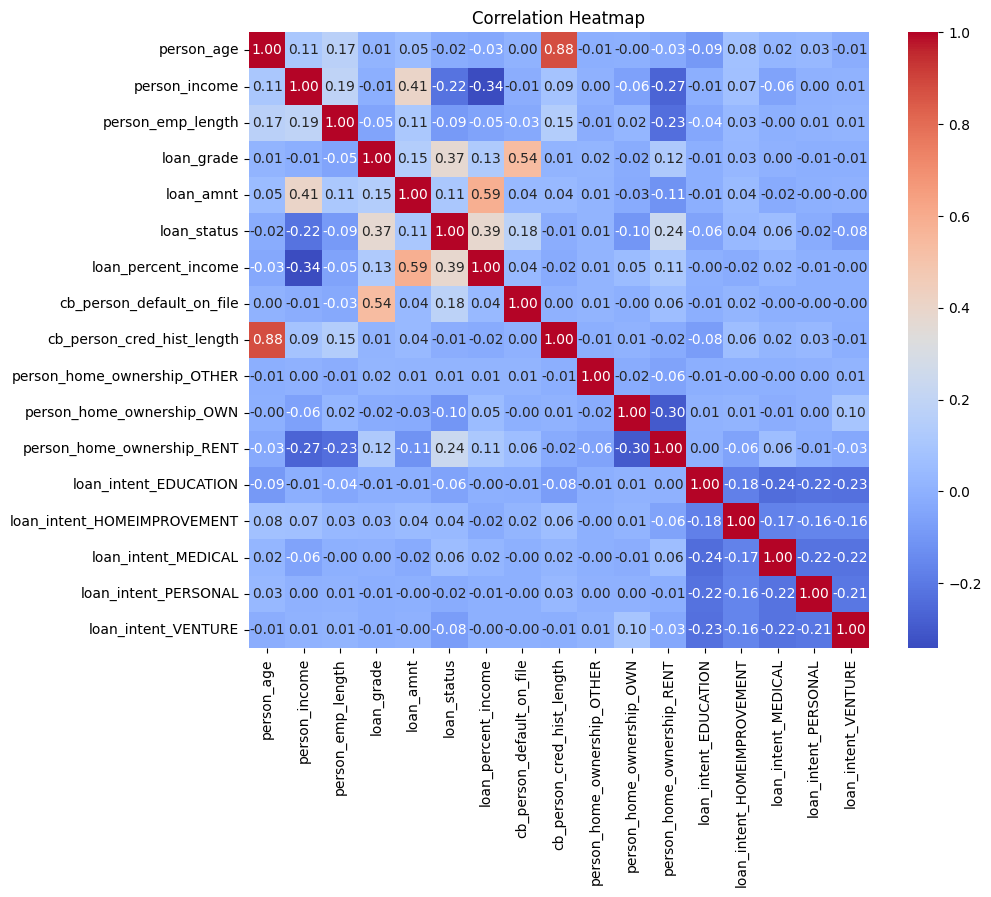

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Split the dataset

In [22]:
x = data.drop(['loan_status'], axis=1)
y = data['loan_status']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Scale numeric features

In [24]:
numeric_cols = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
                'loan_percent_income', 'cb_person_cred_hist_length']

In [25]:
scaler = StandardScaler()

x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

In [26]:
feature_columns = x_train.columns.tolist()

# Classical ML Models

## Perceptron (PLA)

In [27]:
pla = Perceptron(max_iter=1000, eta0=1.0, random_state=42)

pla.fit(x_train, y_train)

Perceptron(random_state=42)

In [28]:
y_pred = pla.predict(x_test)

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8021075468774214

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87      5038
           1       0.54      0.63      0.58      1415

    accuracy                           0.80      6453
   macro avg       0.72      0.74      0.73      6453
weighted avg       0.81      0.80      0.81      6453



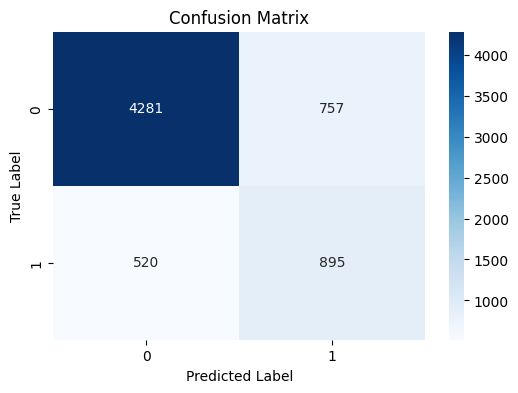

In [30]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
# Reduce to 2D for visualization
pca = PCA(n_components=2)
x_test_2d = pca.fit_transform(x_test)

# Grid for plotting
x_min, x_max = x_test_2d[:, 0].min() - 1, x_test_2d[:, 0].max() + 1
y_min, y_max = x_test_2d[:, 1].min() - 1, x_test_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on grid
grid = np.c_[xx.ravel(), yy.ravel()]
# Transform back to original feature space
grid_orig = pca.inverse_transform(grid)

In [32]:
Z = (pla.predict(grid_orig) > 0.5).astype(int)
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


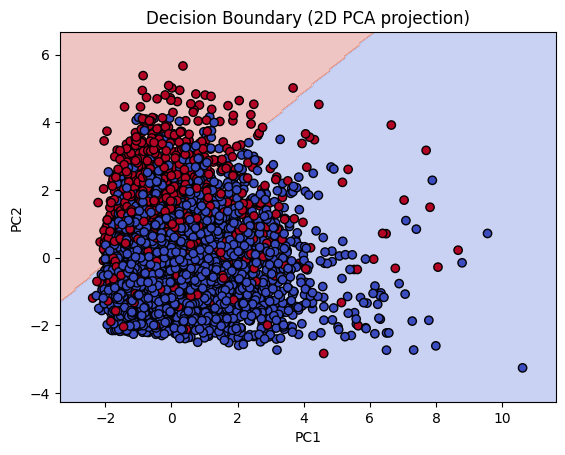

In [33]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(x_test_2d[:,0], x_test_2d[:,1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary (2D PCA projection)')
plt.show()

## Logistic Regression

In [34]:
lg = LogisticRegression(max_iter=1000)
lg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred = lg.predict(x_test)

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8603750193708353

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      5038
           1       0.75      0.54      0.63      1415

    accuracy                           0.86      6453
   macro avg       0.82      0.75      0.77      6453
weighted avg       0.85      0.86      0.85      6453



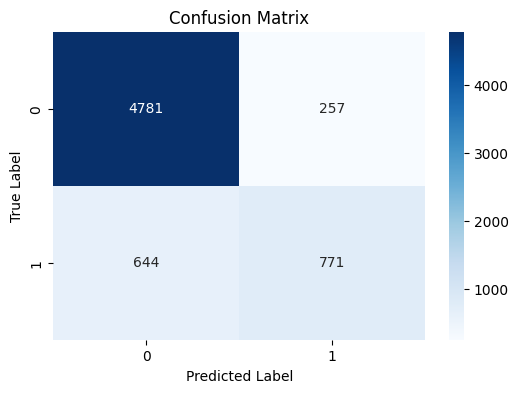

In [37]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [38]:
Z = (lg.predict(grid_orig) > 0.5).astype(int)
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


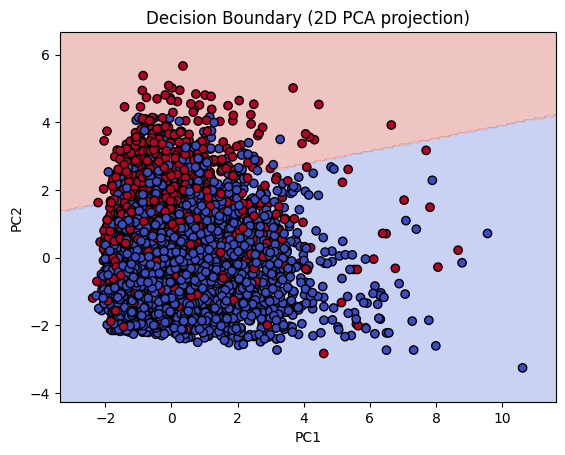

In [39]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(x_test_2d[:,0], x_test_2d[:,1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary (2D PCA projection)')
plt.show()

## Support Vector Machine (SVM)

In [40]:
svm_model = SVC(kernel="rbf", C=1, gamma="scale")  
svm_model.fit(x_train, y_train)

SVC(C=1)

In [41]:
y_pred = svm_model.predict(x_test)

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9138385247171859

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      5038
           1       0.93      0.66      0.77      1415

    accuracy                           0.91      6453
   macro avg       0.92      0.82      0.86      6453
weighted avg       0.92      0.91      0.91      6453



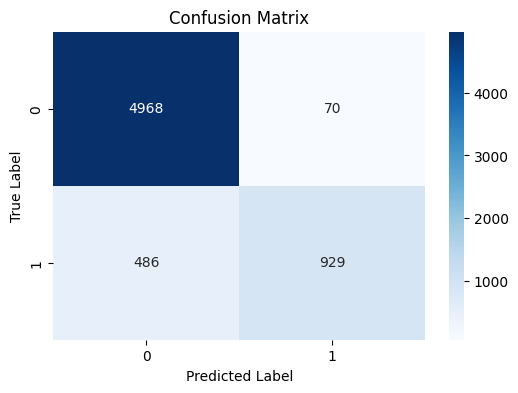

In [43]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
Z = (svm_model.predict(grid_orig) > 0.5).astype(int)
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


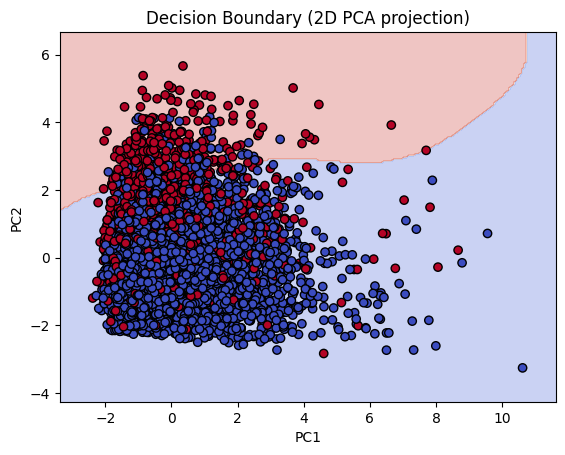

In [45]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(x_test_2d[:,0], x_test_2d[:,1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary (2D PCA projection)')
plt.show()

## Random Forest

In [46]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [47]:
y_pred = rf.predict(x_test)

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9346040601270726

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5038
           1       0.96      0.73      0.83      1415

    accuracy                           0.93      6453
   macro avg       0.94      0.86      0.90      6453
weighted avg       0.94      0.93      0.93      6453



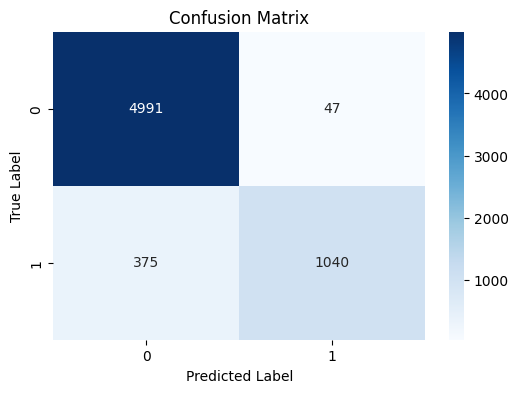

In [49]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
Z = (rf.predict(grid_orig) > 0.5).astype(int)
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


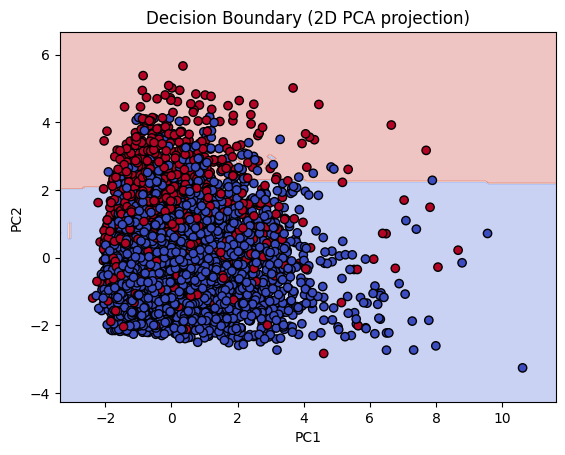

In [51]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(x_test_2d[:,0], x_test_2d[:,1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary (2D PCA projection)')
plt.show()

# Neural Network Model

## Dense neural network (MLP)

In [52]:
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') 
])

nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
nn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1764113829.426471      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1764113829.427123      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=5,            
    restore_best_weights=True, 
    verbose=1
)

In [54]:
history = nn_model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]  
)

Epoch 1/100


I0000 00:00:1764113831.689383      65 service.cc:148] XLA service 0x7cbf24005540 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764113831.689788      65 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1764113831.689810      65 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1764113831.915321      65 cuda_dnn.cc:529] Loaded cuDNN version 90300


 79/646 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4883 - loss: 0.8022

I0000 00:00:1764113832.624691      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


646/646 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7437 - loss: 0.5239 - val_accuracy: 0.8534 - val_loss: 0.3504
Epoch 2/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8699 - loss: 0.3294 - val_accuracy: 0.8814 - val_loss: 0.3094
Epoch 3/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8867 - loss: 0.2987 - val_accuracy: 0.8892 - val_loss: 0.2968
Epoch 4/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8965 - loss: 0.2849 - val_accuracy: 0.8935 - val_loss: 0.2918
Epoch 5/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8990 - loss: 0.2777 - val_accuracy: 0.8989 - val_loss: 0.2831
Epoch 6/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9042 - loss: 0.2703 - val_accuracy: 0.8938 - val_loss: 0.2907
Epoch 7/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9074 - loss: 0.2617 - val_accuracy: 0.8997 - val_loss: 0.2779
Epoch 8/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9061 - loss: 0.2643 - val_accuracy: 0.9004

In [55]:
y_pred = (nn_model.predict(x_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.9189524252285759


## accuracy/loss curves

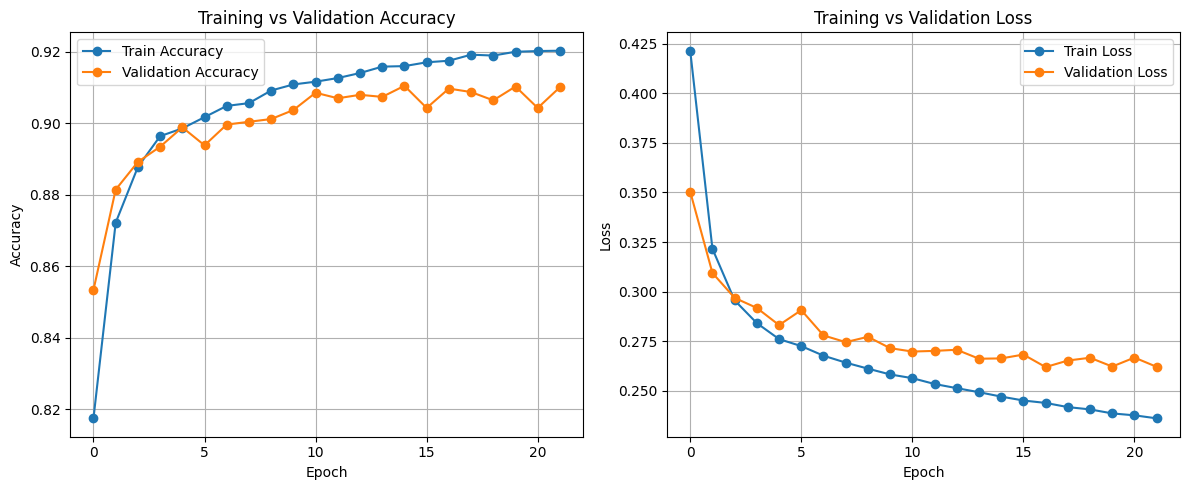

In [56]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss 
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Confusion matrix

202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


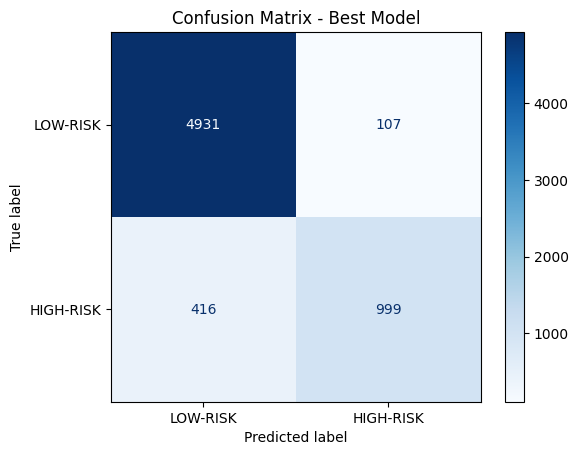

In [57]:
y_pred_prob = nn_model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int) 

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['LOW-RISK', 'HIGH-RISK'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best Model")
plt.show()

## Decision Boundary

In [58]:
Z = (nn_model.predict(grid_orig) > 0.5).astype(int)
Z = Z.reshape(xx.shape)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


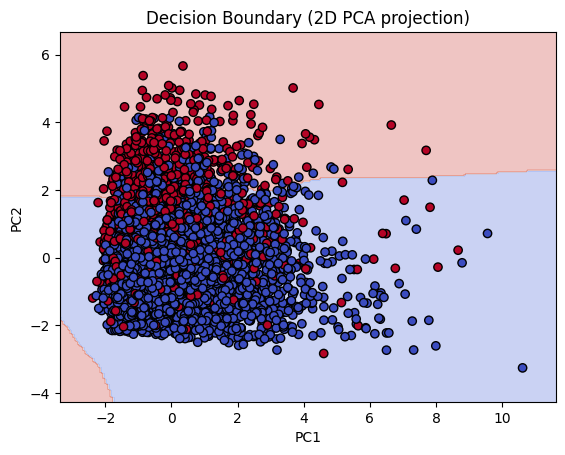

In [59]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(x_test_2d[:,0], x_test_2d[:,1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary (2D PCA projection)')
plt.show()

# Hyperparameter Tuning

In [60]:
def create_model(layers=[32, 16], activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(layers[0], activation=activation, input_shape=(x_train.shape[1],)))
    for neurons in layers[1:]:
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [61]:
def train_and_update(model, description=""):
    history = model.fit(
        x_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        verbose=1,
        callbacks=[early_stop]  
    )
    val_acc = max(history.history['val_accuracy'])
    print(f"{description} → Validation Accuracy: {val_acc:.4f}")
    
    return history

## Try Different Numbers of Layers & Neurons

In [62]:
configs = [[32, 16], [64, 32, 16]]
for cfg in configs:
    model = create_model(layers=cfg)
    train_and_update(model, description=f"Layers {cfg}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7641 - loss: 0.4949 - val_accuracy: 0.8495 - val_loss: 0.3538
Epoch 2/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8692 - loss: 0.3322 - val_accuracy: 0.8719 - val_loss: 0.3201
Epoch 3/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8870 - loss: 0.3008 - val_accuracy: 0.8880 - val_loss: 0.3056
Epoch 4/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8949 - loss: 0.2899 - val_accuracy: 0.8933 - val_loss: 0.3011
Epoch 5/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8961 - loss: 0.2846 - val_accuracy: 0.8938 - val_loss: 0.2955
Epoch 6/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8967 - loss: 0.2829 - val_accuracy: 0.8993 - val_loss: 0.2900
Epoch 7/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9048 - loss: 0.2694 - val_accuracy: 0.8956 - val_loss: 0.2875
Epoch 8/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9013 - loss: 0.2710 - val_accuracy: 0.8983

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


646/646 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8238 - loss: 0.4260 - val_accuracy: 0.8657 - val_loss: 0.3344
Epoch 2/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8846 - loss: 0.3010 - val_accuracy: 0.8874 - val_loss: 0.2964
Epoch 3/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8986 - loss: 0.2790 - val_accuracy: 0.8969 - val_loss: 0.2831
Epoch 4/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9052 - loss: 0.2638 - val_accuracy: 0.9057 - val_loss: 0.2672
Epoch 5/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9094 - loss: 0.2574 - val_accuracy: 0.9099 - val_loss: 0.2622
Epoch 6/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9155 - loss: 0.2423 - val_accuracy: 0.9120 - val_loss: 0.2547
Epoch 7/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9170 - loss: 0.2458 - val_accuracy: 0.9146 - val_loss: 0.2512
Epoch 8/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9249 - loss: 0.2282 - val_accuracy: 0.9163

**so Layers [64, 32, 16] is better**

## Try Different Activation Functions

In [63]:
activations = ['relu', 'tanh', 'sigmoid']
for act in activations:
    model = create_model(activation=act)
    train_and_update(model, description=f"Activation {act}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8131 - loss: 0.4686 - val_accuracy: 0.8634 - val_loss: 0.3392
Epoch 2/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8748 - loss: 0.3212 - val_accuracy: 0.8799 - val_loss: 0.3110
Epoch 3/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8900 - loss: 0.2957 - val_accuracy: 0.8919 - val_loss: 0.2928
Epoch 4/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8919 - loss: 0.2913 - val_accuracy: 0.8983 - val_loss: 0.2863
Epoch 5/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8995 - loss: 0.2713 - val_accuracy: 0.9014 - val_loss: 0.2795
Epoch 6/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9026 - loss: 0.2770 - val_accuracy: 0.8993 - val_loss: 0.2787
Epoch 7/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9022 - loss: 0.2674 - val_accuracy: 0.9026 - val_loss: 0.2738
Epoch 8/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9072 - loss: 0.2642 - val_accuracy: 0.9026

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7547 - loss: 0.4993 - val_accuracy: 0.8458 - val_loss: 0.3581
Epoch 2/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8581 - loss: 0.3424 - val_accuracy: 0.8623 - val_loss: 0.3353
Epoch 3/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8704 - loss: 0.3272 - val_accuracy: 0.8712 - val_loss: 0.3223
Epoch 4/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8811 - loss: 0.3015 - val_accuracy: 0.8816 - val_loss: 0.3103
Epoch 5/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8914 - loss: 0.2966 - val_accuracy: 0.8820 - val_loss: 0.3095
Epoch 6/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8974 - loss: 0.2887 - val_accuracy: 0.8927 - val_loss: 0.2971
Epoch 7/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8974 - loss: 0.2789 - val_accuracy: 0.8960 - val_loss: 0.2908
Epoch 8/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9009 - loss: 0.2766 - val_accu

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7761 - loss: 0.5161 - val_accuracy: 0.8375 - val_loss: 0.3915
Epoch 2/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8477 - loss: 0.3708 - val_accuracy: 0.8437 - val_loss: 0.3686
Epoch 3/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8540 - loss: 0.3541 - val_accuracy: 0.8439 - val_loss: 0.3640
Epoch 4/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8543 - loss: 0.3523 - val_accuracy: 0.8473 - val_loss: 0.3615
Epoch 5/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8540 - loss: 0.3526 - val_accuracy: 0.8466 - val_loss: 0.3620
Epoch 6/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8577 - loss: 0.3464 - val_accuracy: 0.8489 - val_loss: 0.3587
Epoch 7/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8586 - loss: 0.3494 - val_accuracy: 0.8489 - val_loss: 0.3566
Epoch 8/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8615 - loss: 0.3404 - val_accuracy: 0.8501

**so Activation relu is the best**

## Try Different Optimizers and Learning Rates

In [64]:
optimizers = [
    Adam(learning_rate=0.001),
    RMSprop(learning_rate=0.001),
    SGD(learning_rate=0.01)
]
for opt in optimizers:
    model = create_model(optimizer=opt)
    train_and_update(model, description=f"Optimizer {opt.get_config()['name']}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8112 - loss: 0.4571 - val_accuracy: 0.8596 - val_loss: 0.3469
Epoch 2/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8698 - loss: 0.3283 - val_accuracy: 0.8849 - val_loss: 0.3099
Epoch 3/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8868 - loss: 0.2953 - val_accuracy: 0.8886 - val_loss: 0.2951
Epoch 4/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8920 - loss: 0.2903 - val_accuracy: 0.8900 - val_loss: 0.2937
Epoch 5/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8960 - loss: 0.2799 - val_accuracy: 0.8905 - val_loss: 0.2899
Epoch 6/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8990 - loss: 0.2784 - val_accuracy: 0.8950 - val_loss: 0.2886
Epoch 7/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9052 - loss: 0.2662 - val_accuracy: 0.8993 - val_loss: 0.2812
Epoch 8/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9057 - loss: 0.2646 - val_accuracy: 0.8993

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7702 - loss: 0.4949 - val_accuracy: 0.8503 - val_loss: 0.3512
Epoch 2/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8625 - loss: 0.3364 - val_accuracy: 0.8607 - val_loss: 0.3369
Epoch 3/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8782 - loss: 0.3132 - val_accuracy: 0.8807 - val_loss: 0.3106
Epoch 4/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8880 - loss: 0.2982 - val_accuracy: 0.8840 - val_loss: 0.3062
Epoch 5/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8869 - loss: 0.2949 - val_accuracy: 0.8929 - val_loss: 0.2926
Epoch 6/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8910 - loss: 0.2896 - val_accuracy: 0.8946 - val_loss: 0.2871
Epoch 7/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8947 - loss: 0.2877 - val_accuracy: 0.8960 - val_loss: 0.2892
Epoch 8/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8977 - loss: 0.2832 - val_accuracy: 0.8975

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


646/646 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7373 - loss: 0.5845 - val_accuracy: 0.8115 - val_loss: 0.4437
Epoch 2/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8352 - loss: 0.4086 - val_accuracy: 0.8355 - val_loss: 0.3915
Epoch 3/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8436 - loss: 0.3745 - val_accuracy: 0.8419 - val_loss: 0.3713
Epoch 4/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8510 - loss: 0.3577 - val_accuracy: 0.8468 - val_loss: 0.3625
Epoch 5/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8601 - loss: 0.3406 - val_accuracy: 0.8549 - val_loss: 0.3497
Epoch 6/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8643 - loss: 0.3325 - val_accuracy: 0.8582 - val_loss: 0.3447
Epoch 7/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8611 - loss: 0.3358 - val_accuracy: 0.8617 - val_loss: 0.3381
Epoch 8/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8686 - loss: 0.3269 - val_accuracy: 0.8659

**so Optimizer adam is best**

## Try Different Batch Sizes

In [65]:
batch_sizes = [16, 32, 64]
for bs in batch_sizes:
    model = create_model()
    history = model.fit(
        x_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=bs,
        verbose=1,
        callbacks=[early_stop]
    )
    val_acc = max(history.history['val_accuracy'])
    print(f"Batch Size {bs} → Validation Accuracy: {val_acc:.4f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1291/1291 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7963 - loss: 0.4618 - val_accuracy: 0.8642 - val_loss: 0.3327
Epoch 2/100
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8814 - loss: 0.3064 - val_accuracy: 0.8933 - val_loss: 0.2982
Epoch 3/100
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8978 - loss: 0.2862 - val_accuracy: 0.8896 - val_loss: 0.2952
Epoch 4/100
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8964 - loss: 0.2817 - val_accuracy: 0.8962 - val_loss: 0.2869
Epoch 5/100
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8997 - loss: 0.2735 - val_accuracy: 0.8985 - val_loss: 0.2787
Epoch 6/100
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9046 - loss: 0.2689 - val_accuracy: 0.9037 - val_loss: 0.2733
Epoch 7/100
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9090 - loss: 0.2585 - val_accuracy: 0.9060 - val_loss: 0.2706
Epoch 8/100
1291/1291 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9105 - loss: 0.2565 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


646/646 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7916 - loss: 0.4685 - val_accuracy: 0.8524 - val_loss: 0.3524
Epoch 2/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8644 - loss: 0.3337 - val_accuracy: 0.8704 - val_loss: 0.3219
Epoch 3/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8855 - loss: 0.3017 - val_accuracy: 0.8867 - val_loss: 0.3006
Epoch 4/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8938 - loss: 0.2855 - val_accuracy: 0.8929 - val_loss: 0.2905
Epoch 5/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8991 - loss: 0.2782 - val_accuracy: 0.8991 - val_loss: 0.2835
Epoch 6/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8995 - loss: 0.2751 - val_accuracy: 0.8989 - val_loss: 0.2829
Epoch 7/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9054 - loss: 0.2693 - val_accuracy: 0.8962 - val_loss: 0.2835
Epoch 8/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9048 - loss: 0.2677 - val_accuracy: 0.9012

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8049 - loss: 0.4913 - val_accuracy: 0.8446 - val_loss: 0.3695
Epoch 2/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8579 - loss: 0.3479 - val_accuracy: 0.8634 - val_loss: 0.3415
Epoch 3/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8726 - loss: 0.3283 - val_accuracy: 0.8747 - val_loss: 0.3269
Epoch 4/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8846 - loss: 0.3033 - val_accuracy: 0.8789 - val_loss: 0.3111
Epoch 5/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8910 - loss: 0.2955 - val_accuracy: 0.8929 - val_loss: 0.2963
Epoch 6/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8938 - loss: 0.2861 - val_accuracy: 0.8935 - val_loss: 0.2933
Epoch 7/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8998 - loss: 0.2776 - val_accuracy: 0.8979 - val_loss: 0.2895
Epoch 8/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9028 - loss: 0.2700 - val_accuracy: 0.8956

**so Batch Size 32 is best**

# Train best model with best parameters

In [66]:
best_model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    
    Dense(1, activation='sigmoid') 
])

best_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = best_model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]  
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


646/646 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7960 - loss: 0.4821 - val_accuracy: 0.8681 - val_loss: 0.3383
Epoch 2/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8587 - loss: 0.3485 - val_accuracy: 0.8884 - val_loss: 0.2995
Epoch 3/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8743 - loss: 0.3142 - val_accuracy: 0.8902 - val_loss: 0.2854
Epoch 4/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8879 - loss: 0.2906 - val_accuracy: 0.9020 - val_loss: 0.2723
Epoch 5/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8978 - loss: 0.2719 - val_accuracy: 0.9033 - val_loss: 0.2691
Epoch 6/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9042 - loss: 0.2670 - val_accuracy: 0.9059 - val_loss: 0.2655
Epoch 7/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9040 - loss: 0.2702 - val_accuracy: 0.9072 - val_loss: 0.2629
Epoch 8/100
646/646 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9082 - loss: 0.2570 - val_accuracy: 0.9113

In [67]:
y_pred = (best_model.predict(x_test) > 0.5).astype('int32')
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test Accuracy: 0.9217418255075159


## Training and validation loss/accuracy curves

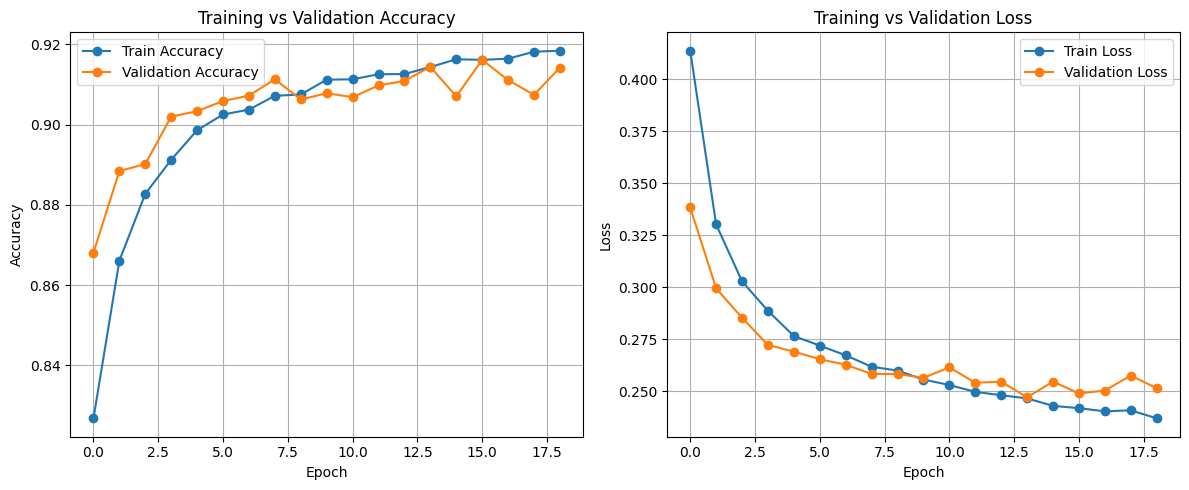

In [68]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss 
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Decision Boundary

In [69]:
Z = (best_model.predict(grid_orig) > 0.5).astype(int)
Z = Z.reshape(xx.shape)

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


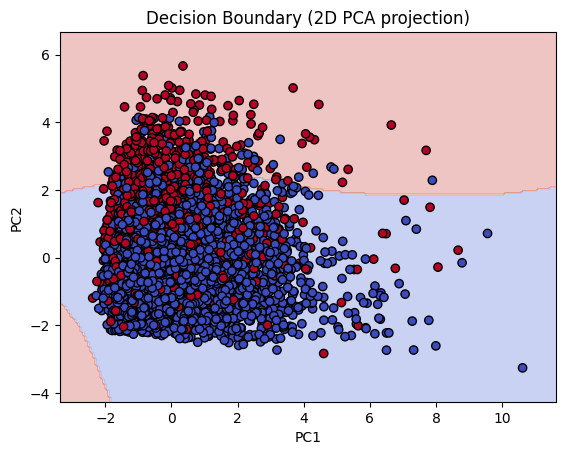

In [70]:
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(x_test_2d[:,0], x_test_2d[:,1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary (2D PCA projection)')
plt.show()

## Confusion matrix

202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


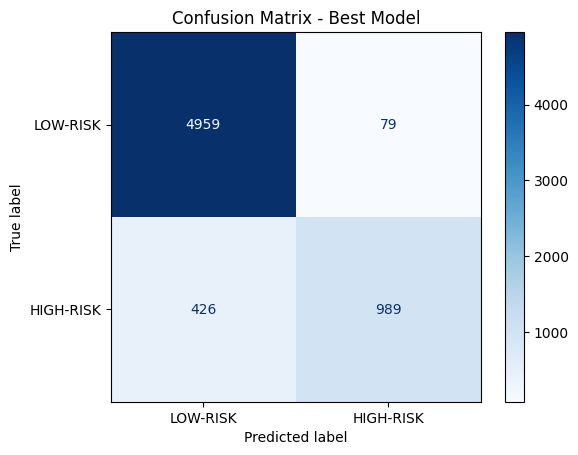

In [71]:
y_pred_prob = best_model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to 0/1

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['LOW-RISK', 'HIGH-RISK'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best Model")
plt.show()

# Save Best model

In [72]:
best_model.save('best_model.h5')
model = load_model('best_model.h5')

# Prediction on Unseen Data

## 5 new hypothetical customers

In [ ]:
new_customers = pd.DataFrame([
    {
        "person_age": 22,
        "person_income": 59000,
        "person_home_ownership": "RENT",
        "person_emp_length": 123.0,
        "loan_intent": "PERSONAL",
        "loan_grade": "B",
        "loan_amnt": 15000,
        "loan_int_rate": 9.5,
        "loan_percent_income": 0.25,
        "cb_person_default_on_file": "N",
        "cb_person_cred_hist_length": 5
    },
    {
        "person_age": 45,
        "person_income": 120000,
        "person_home_ownership": "MORTGAGE",
        "person_emp_length": 240.0,
        "loan_intent": "EDUCATION",
        "loan_grade": "A",
        "loan_amnt": 10000,
        "loan_int_rate": 7.2,
        "loan_percent_income": 0.08,
        "cb_person_default_on_file": "N",
        "cb_person_cred_hist_length": 15
    },
    {
        "person_age": 28,
        "person_income": 48000,
        "person_home_ownership": "RENT",
        "person_emp_length": 15.0,
        "loan_intent": "PERSONAL",
        "loan_grade": "C",
        "loan_amnt": 8000,
        "loan_int_rate": 7.1,
        "loan_percent_income": 0.16,
        "cb_person_default_on_file": "N",
        "cb_person_cred_hist_length": 2
    },
    {
        "person_age": 52,
        "person_income": 98000,
        "person_home_ownership": "RENT",
        "person_emp_length": 140.0,
        "loan_intent": "VENTURE",
        "loan_grade": "E",
        "loan_amnt": 40000,
        "loan_int_rate": 18.2,
        "loan_percent_income": 0.41,
        "cb_person_default_on_file": "Y",
        "cb_person_cred_hist_length": 9
    },
    {
        "person_age": 31,
        "person_income": 75000,
        "person_home_ownership": "OWN",
        "person_emp_length": 60.0,
        "loan_intent": "MEDICAL",
        "loan_grade": "D",
        "loan_amnt": 25000,
        "loan_int_rate": 16.5,
        "loan_percent_income": 0.33,
        "cb_person_default_on_file": "Y",
        "cb_person_cred_hist_length": 6
    },
    {
        "person_age": 40,
        "person_income": 55000,
        "person_home_ownership": "RENT",
        "person_emp_length": 30.0,
        "loan_intent": "PERSONAL",
        "loan_grade": "E",
        "loan_amnt": 30000,
        "loan_int_rate": 17.0,
        "loan_percent_income": 0.55,
        "cb_person_default_on_file": "Y",
        "cb_person_cred_hist_length": 4
    }
])


## Apply same preprocessing

In [74]:
grade_order = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7}

new_customers['cb_person_default_on_file'] = new_customers['cb_person_default_on_file'].map({'Y':1, 'N':0})
new_customers['loan_grade'] = new_customers['loan_grade'].map(grade_order)
new_customers = pd.get_dummies(new_customers, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

new_customers = new_customers.reindex(columns=feature_columns, fill_value=0)

new_customers[numeric_cols] = scaler.transform(new_customers[numeric_cols])

## Predict with the best model

In [75]:
probabilities = best_model.predict(new_customers)
predictions = (probabilities > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


In [76]:
for i, (prob, pred) in enumerate(zip(probabilities, predictions)):
    risk = "HIGH-RISK" if pred == 1 else "LOW-RISK"
    print(f"Customer {i+1}:  Probability={prob[0]:.4f} → {risk}")


Customer 1:  Probability=0.8178 → HIGH-RISK
Customer 2:  Probability=0.9991 → HIGH-RISK
Customer 3:  Probability=0.1656 → LOW-RISK
Customer 4:  Probability=0.5542 → HIGH-RISK
Customer 5:  Probability=0.3871 → LOW-RISK
Customer 6:  Probability=1.0000 → HIGH-RISK
